Goal: Set up structure of grid graph<->information dual

In [2]:
'''
IMPORTS
'''

%matplotlib inline

# Standard imports
import copy
import itertools

# Scientific computing imports
import numpy
import matplotlib.pyplot as plt
import networkx as nx
import pandas

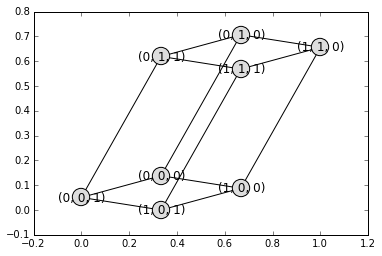

In [3]:
grid_size=[2,2,2]
g=nx.grid_graph(dim=grid_size)
g_layout = nx.spectral_layout(g)
nx.draw_networkx(g, pos=g_layout, node_color='#dddddd')

In [107]:
print g.nodes()
l='x'
print l

[(1, 0, 0), (0, 0, 1), (1, 0, 1), (0, 0, 0)]
x


{'H2': {'orientation': 'horizontal', 'availability': ['E', 'M', 'I', 'H']}, 'H0': {'orientation': 'horizontal', 'availability': ['E', 'M', 'I', 'H']}, 'H1': {'orientation': 'horizontal', 'availability': ['E', 'M', 'I', 'H']}, 'T2': {'orientation': 'transverse', 'availability': ['E', 'M', 'I', 'H']}, 'T0': {'orientation': 'transverse', 'availability': ['E', 'M', 'I', 'H']}, 'T1': {'orientation': 'transverse', 'availability': ['E', 'M', 'I', 'H']}, 'L2': {'orientation': 'longitudinal', 'availability': ['E', 'M', 'I', 'H']}, 'L0': {'orientation': 'longitudinal', 'availability': ['E', 'M', 'I', 'H']}, 'L1': {'orientation': 'longitudinal', 'availability': ['E', 'M', 'I', 'H']}}


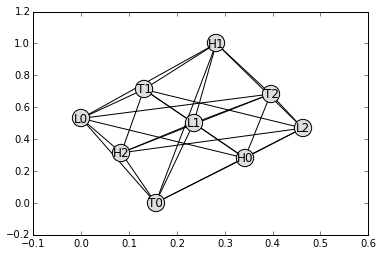

In [4]:
#label streets and penetrations
streets={}
geometric_characteristics={'H':'horizontal','L':'longitudinal','T':'transverse'}
structural_denotation=['T','L','H']
transfer_types=['E','M','I','H']
for i in range(len(grid_size)):
    for structure in range(grid_size[i]+1):
        s_name='{}{}'.format(structural_denotation[i],structure)
        streets[s_name]={}
        streets[s_name]['orientation']=geometric_characteristics[structural_denotation[i]]
        streets[s_name]['availability']=transfer_types

#link structure and edges between zones (vertices)
print streets
for u,v in g.edges():
    coord_change=[(a is b) for a, b in zip(u,v)].index(False)
    if coord_change==0: #move in x
        g[u][v]['penetration']='T{}'.format(max(u[0],v[0]))
        g[u][v]['streets']=['L{}'.format(u[1]),'L{}'.format((u[1]+1)),'H{}'.format(u[2]),'H{}'.format((u[2]+1))]   
    
    if coord_change==1: #move in y
        g[u][v]['penetration']='L{}'.format(max(u[1],v[1]))
        g[u][v]['streets']=['H{}'.format(u[1]),'H{}'.format((u[1]+1)),'T{}'.format(u[2]),'T{}'.format((u[2]+1))]
        
    if coord_change==2: #move in z
        g[u][v]['penetration']='H{}'.format(max(u[2],v[2]))
        g[u][v]['streets']=['T{}'.format(u[1]),'T{}'.format((u[1]+1)),'L{}'.format(u[2]),'L{}'.format((u[2]+1))]        

    
#generate default information dual
i_g=nx.Graph()
for key in streets:
    if streets[key]['orientation'] is 'horizontal':
        for cross_street in streets:
            if streets[cross_street]['orientation'] is not 'horizontal':
                i_g.add_edge(key,cross_street)
                
    if streets[key]['orientation'] is 'transverse':
        for cross_street in streets:
            if streets[cross_street]['orientation'] is not 'transverse':
                i_g.add_edge(key,cross_street)
                
    if streets[key]['orientation'] is 'longitudinal':
        for cross_street in streets:
            if streets[cross_street]['orientation'] is not 'longitudinal':
                i_g.add_edge(key,cross_street)
                
nx.draw_networkx(i_g, node_color='#dddddd')


In [122]:
print i_g.nodes(data=True)
print streets.items()


[('T10', {}), ('T8', {}), ('T9', {}), ('T6', {}), ('T7', {}), ('T4', {}), ('T5', {}), ('T2', {}), ('T3', {}), ('T0', {}), ('T1', {}), ('L4', {}), ('L5', {}), ('L2', {}), ('L3', {}), ('L0', {}), ('L1', {}), ('H2', {}), ('H3', {}), ('H0', {}), ('H1', {}), ('H6', {}), ('H7', {}), ('H4', {}), ('H5', {})]
[('T10', {'orientation': 'transverse', 'availability': ['E', 'M', 'I', 'H']}), ('T8', {'orientation': 'transverse', 'availability': ['E', 'M', 'I', 'H']}), ('T9', {'orientation': 'transverse', 'availability': ['E', 'M', 'I', 'H']}), ('T6', {'orientation': 'transverse', 'availability': ['E', 'M', 'I', 'H']}), ('T7', {'orientation': 'transverse', 'availability': ['E', 'M', 'I', 'H']}), ('T4', {'orientation': 'transverse', 'availability': ['E', 'M', 'I', 'H']}), ('T5', {'orientation': 'transverse', 'availability': ['E', 'M', 'I', 'H']}), ('T2', {'orientation': 'transverse', 'availability': ['E', 'M', 'I', 'H']}), ('T3', {'orientation': 'transverse', 'availability': ['E', 'M', 'I', 'H']}), ('T

In [ ]:
i_g=nx.Graph()
for key in streets:
    if streets[key]['orientation'] is 'horizontal':
        for cross_street in streets:
            if streets[cross_street]['orientation'] is not 'horizontal':
                i_g.add_edge(key,cross_street)
                
    if streets[key]['orientation'] is 'transverse':
        for cross_street in streets:
            if streets[cross_street]['orientation'] is not 'transverse':
                i_g.add_edge(key,cross_street)
                
    if streets[key]['orientation'] is 'longitudinal':
        for cross_street in streets:
            if streets[cross_street]['orientation'] is not 'longitudinal':
                i_g.add_edge(key,cross_street)

i_g=nx.Graph()